In [ ]:
import matplotlib.pyplot as plt
from src.funel_graph import FunelGraph
colors = [
    ['#C33764', '#1BFFFF'],['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],['#1BFFFF', '#e05153'],
    ['#009245', '#FCEE21']
    ]

fg = FunelGraph()
fg.prepare()
fg.draw(colors=colors, apply_colorQ=True)
plt.savefig('data\example.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
from matplotlib.text import Annotation
from matplotlib.transforms import Bbox

title_kwargs = dict(
    size=15,
    color="tab:orange",
    va='top', ha='left',
    family='sans-serif',
    weight="bold",
    )

label_kwargs = dict(
    size=10,
    color='#e3dac9',
    va='top', ha='left',
    weight='bold', 
    family='sans-serif'
    )

def get_scale(text:Annotation, rect:Rectangle):
    """ # try to fit text to box

        import matplotlib.pyplot as plt
        from matplotlib.axes import Axes
        from matplotlib.patches import Rectangle
        from matplotlib.text import Annotation
        from matplotlib.transforms import Bbox

        def get_scale(ax:Axes, text:Annotation, rect:Rectangle):
            rect_Bbox:Bbox = rect.get_window_extent()
            text_Bbox:Bbox = text.get_window_extent()
            scale = min(rect_Bbox.height / text_Bbox.height,
                        rect_Bbox.width / text_Bbox.width)
            return scale

        fig, ax = plt.subplots()
        ax.set(xlim=(0, 2), ylim=(0, 2))
        golden = (1+5**0.5)/2
        ax.set_aspect(1/golden)

        x0, y0, x1, y1 = 0, 1, 1, 1.5 # those are figure coordinates 
        width, height= x1 - x0, y1 - y0

        rect = Rectangle((x0, y0), width, height, fc="none", ec="tab:blue", lw=1)
        ax.add_patch(rect)

        text = ax.annotate(text='Matplolib', xy=(0,0), xytext=(0,1), xycoords=rect,
                        ha="left", va="top",c='tab:orange')

        scale = get_scale(ax, text, rect)
        text.set_fontsize(text.get_fontsize()*scale)

        ax.hlines(y=[0,1], xmin=-1, xmax=4,linestyle=(0, (1, 10)))
        ax.vlines(x=[0,1], ymin=-1, ymax=4,linestyle=(0, (1, 10)))
        plt.show()
    """

    rect_Bbox:Bbox = rect.get_window_extent()
    text_Bbox:Bbox = text.get_window_extent()
    scale = min(rect_Bbox.height / text_Bbox.height,
                rect_Bbox.width / text_Bbox.width)
    return scale

def divide_according_to_ratios_and_quantities(
        length:float=2.0,
        strength:np.ndarray=np.array([0.5, 1/3]),
        number: np.ndarray=np.array([2, 3]),
        ):
    """ The use:
    
        import numpy as np
        import matplotlib.pyplot as plt

        X = divide_according_to_ratios_and_quantities(length=1, strength=np.array([0.5, 1/6]), number=np.array([2, 3]))
        Y = divide_according_to_ratios_and_quantities(length=1, strength=np.array([1/6, 0.5]), number=np.array([2, 5]))
        pts = np.array(np.meshgrid(X,Y)).T.reshape(-1,2)
        fig, ax = plt.subplots()
        ax.set(xlim=(-0.2,1.2),ylim=(-0.2,1.2))
        ax.set_aspect('equal')
        ax.scatter(*pts.T)
        plt.show()
    """
    total  = (strength * number).sum()
    ratios = (strength * number) / total
    dividers = np.cumsum(np.hstack(([0],ratios))*length)
    intervals = np.vstack((dividers[:-1],dividers[1:])).T
    # why +1? - linspace needs one more num to procude <number> of intervals
    res = np.hstack([
        np.linspace(*ep, number[i] + 1) 
         for i, ep in enumerate(intervals)
         ])
    return res

window_width = 1

window_height = 0.5
graph_height = 1

fig, ax = plt.subplots()
ax.set_facecolor('#393862')
# golden = (1+5**0.5)/2
# ax.set_aspect()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set(xlim=(-0.1, 2*window_width+0.1), ylim=(-0.1, 1 + window_height+ 0.1))
ax.hlines(y=[0, 1, 1.5], xmin=-1, xmax=3, lw=1, colors='w', linestyle=(0, (1, 10)))
ax.vlines(x=[0, 1, 2], ymin=-1, ymax=2, lw=1,colors='w', linestyle=(0, (1, 10)))

# future function arguments:
xx = 0

visible = False
titles = ['__init__.py']
labels =  ['34 of X', '45 of Y','24 of Z']
str_s = np.array([1.5, 1])
numbers_sum = '103'



starting_points = divide_according_to_ratios_and_quantities(
    length=window_height,
    strength=str_s,
    number=np.array([len(titles), len(labels)])
    )
anchors = 1 + window_height - starting_points
titles_anchors = anchors[:len(titles)+1]
labels_anchors = anchors[-len(labels)-1:]

def draw_from_anchors(ax:Axes, xx, string_list, width, anchors, above_or_below, edge_color, text_kwargs):
    """ puts string from string_list in places described by anchors
        find minimum scaling and scale the same """

# def draw_from_anchors(ax:Axes, xx, string_list, width, anchors, above_or_below, ec, text_kwargs):
#     """ puts string from string_list in places described by anchors
#         find minimum scaling and scale the same """
    annotations = []
    scales = []
    height = abs(above_or_below - anchors[0]) if len(anchors) == 1 else np.diff(anchors)[0]
    for i, string in enumerate(string_list):
        rect = Rectangle(xy = (xx, anchors[i]), 
                            width=width, height=height, 
                            fill=False, ec=edge_color,lw=0.5 ,ls='--',visible=visible)
        ax.add_patch(rect)
        annotations.append(ax.annotate(string, xy=(0,1), xytext=(0,1), xycoords=rect, **text_kwargs))
        scales.append(get_scale(annotations[-1], rect))
    scale = min(scales)
    for text in annotations:
        text:Annotation
        text.set_fontsize(text.get_fontsize() * scale)

draw_from_anchors(
    ax=ax,
    xx=xx,
    string_list=titles,
    width=1,
    anchors=titles_anchors,
    above_or_below=titles_anchors[0],
    edge_color='orange',
    text_kwargs=title_kwargs)

draw_from_anchors(
    ax=ax,
    xx=xx,
    string_list=labels,
    width=0.5,
    anchors=labels_anchors,
    above_or_below=titles_anchors[-1],
    edge_color='w',
    text_kwargs=label_kwargs)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx = 0
visible = False
titles = ['__init__.py']
labels =  ['34 of X', '45 of Y','24 of Z']
str_s = np.array([1.5, 1])
labels_sum = '103'

fig, ax = plt.subplots()
ax.set_facecolor('#393862')
# golden = (1+5**0.5)/2
# ax.set_aspect(1/golden)

ax.set(xlim=(-0.1, 2*window_width+0.1), ylim=(-0.1, 1 + window_height+ 0.1))
ax.hlines(y=[0, 1, 1.5], xmin=-1, xmax=3, lw=1, colors='w', linestyle=(0, (1, 10)))
ax.vlines(x=[0, 1, 2], ymin=-1, ymax=2, lw=1,colors='w', linestyle=(0, (1, 10)))

def draw_title_and_labels(
        ax=ax,
        xx=xx,
        titles=titles,
        labels=labels,
        title_vs_label_strength=str_s,
        labels_sum_sum=labels_sum
        ):
    starting_points = divide_according_to_ratios_and_quantities(
        length=window_height,
        strength=title_vs_label_strength,
        number=np.array([len(titles), len(labels)])
        )
    anchors = 1 + window_height - starting_points
    titles_anchors = anchors[:len(titles)+1]
    labels_anchors = anchors[-len(labels)-1:]

    draw_from_anchors(
        ax=ax,
        xx=xx,
        string_list=titles,
        width=1,
        anchors=titles_anchors,
        above_or_below=titles_anchors[0],
        ec='orange',
        text_kwargs=title_kwargs
        )

    draw_from_anchors(
        ax=ax,
        xx=xx,
        string_list=labels,
        width=0.5,
        anchors=labels_anchors,
        above_or_below=titles_anchors[-1],
        ec='w',
        text_kwargs=label_kwargs
        )
    
    return ax
draw_title_and_labels()
draw_title_and_labels(xx=1, titles=['mniamek'],labels =  [' 1', ' 13',' 12'])
plt.show()


In [ ]:
from typing import List
def draw_lists_of_strings(
    s_args:List[List[str]], 
    rel__size:List[float], 
    font_kwargs:List[dict]
    ):
    """ Strings from <s_args>[i] are drawn with:
            <rel_size>[i mod len(rel__size)] size
            <font_kwargs>[i mod len(font_kwargs)] font kwargs
    """
    num_lines = list(map(len,s_args))
    calc_left_top_anchors(h_size, rel__size, no_lines)

In [56]:
def relative_01_division(relative_sizes, num_in_group):
    """ Find endpoints of interval division
        Assume len(relative_sizes) == len(relative_sizes)
        """
    strength = np.array(relative_sizes)
    number = np.array(num_in_group)
    for_split = np.cumsum(number+1)[:-1]

    total  = (strength * number).sum()
    ratios = (strength * number) / total
    
    group_dividers = np.cumsum(np.hstack(([0], ratios)))
    intervals = np.vstack((group_dividers[:-1], group_dividers[1:])).T
    # why +1? - linspace needs one more num to procude <number> of intervals
    res = np.hstack([
        np.linspace(*ep, number[i] + 1) 
         for i, ep in enumerate(intervals)
         ])
    return group_dividers, np.split(res, for_split)

def produce_intervals()
relative_01_division([2, 1],[2,4])

(array([0. , 0.5, 1. ]),
 [array([0.  , 0.25, 0.5 ]), array([0.5  , 0.625, 0.75 , 0.875, 1.   ])])

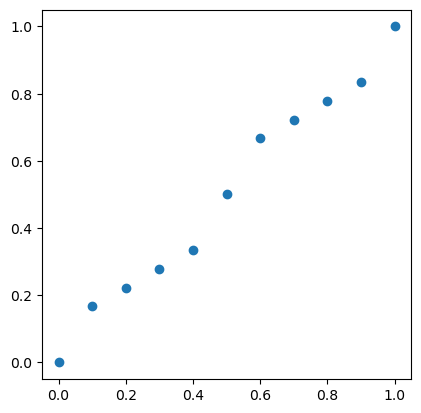

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def produce_anchors(start:float, stop:float, rel_str:List[float], nums:List[int]):
    """ Return partition of interval (start, stop) into queue of queues of intervals.
        Intervals in each queue are of equal length and do not overlap.
        There are len(nums) queues with nums[i] intervals in i-th queue.
        In total there are sum(nums) intervals.
        If length_<i> denotes length of a interval belonging to <i>-th queue then
            length_i/length_j == rel_str[i]/rel_str[j]
        is fulfilled.
    """
    # Relative division of (0,1) functions:
    def relative_01_group_dividers(relative_sizes, num_in_group):
        """ Return endpoints of queues of equal length intervals in (0, 1).
            Assume len(relative_sizes) == len(relative_sizes)
            """
        strength = np.array(relative_sizes)
        number = np.array(num_in_group)

        total  = (strength * number).sum()
        ratios = (strength * number) / total
        return np.cumsum(np.hstack(([0], ratios)))

    def produce_intervals(arr: np.array):
        """split array of increasing numbers into array of pairs of consecutive points"""
        starts  = arr[:-1]
        ends    = arr[1:]
        return np.array([[a,b] for a,b in zip(starts, ends)])

    def equal_divide_of(interval_list, into_this_many):
        """ Divide interval_list[i] into into_this_many[i] points"""
        ziped = zip(interval_list, into_this_many)
        return [np.linspace(*interval, n+1) for interval, n in ziped]

    # Relative division of (0,1) interval:
    rel_01_dividers =  relative_01_group_dividers(rel_str, nums)
    intervals_to_divide = produce_intervals(rel_01_dividers)
    intervals_divided = equal_divide_of(intervals_to_divide, nums)
    result_01 = list(map(produce_intervals, intervals_divided))

    # scaling to (start, stop) 
    result_XY = list(map(
        lambda arr : start + (stop-start)*arr,
        result_01
    ))
    return result_XY

number_of_points = [1, 3, 2, 3, 1]
relative_weight = [3, 1, 3, 1, 3]

all_points = np.vstack(produce_anchors(0, 1, relative_weight, number_of_points))
y = np.hstack([all_points[:,0],[1]])
x = np.linspace(0,1,len(y))

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x, y)
plt.show()

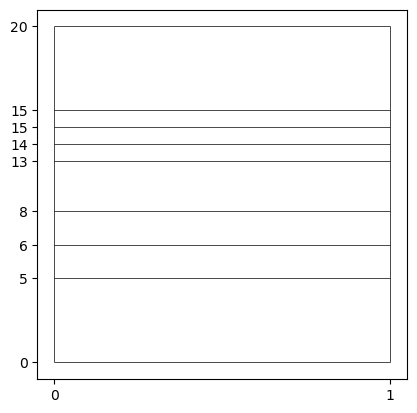

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from src.text.text_anchors import produce_anchors
number_of_points = [1, 2, 1, 3, 1]
relative_weight = [5, 2, 3, 1, 5]
start, stop = 0, 1
anchors = produce_anchors(start, stop, relative_weight, number_of_points)
# for integer relative weights line below yields true integer labels for relative partition
labels = np.round(y*sum(np.array(relative_weight)*np.array(number_of_points))).astype(int)

pts = np.vstack(anchors)
y = np.hstack(tup=(pts[:,0], pts[-1,-1]))
x = np.linspace(0,1,len(y))

eps = 0.05
fig, ax = plt.subplots()
ax.set(xlim=(0-eps,1+eps), ylim=(0-eps,1+eps), aspect='equal')
ax.hlines(y, xmin=0, xmax=1, colors='k', lw=0.5)
ax.vlines([0,1], ymin=0, ymax=1, colors='k', lw=0.5)
ax.set_yticks(ticks=y,labels=labels)
ax.set_xticks(ticks=[0,1])
plt.show()

In [3]:
y*sum(np.array(relative_weight)*np.array(number_of_points))

array([ 0.,  3.,  4.,  5.,  6.,  9., 12., 13., 14., 15., 18.])